In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statistics 
import re
from collections import defaultdict

In [2]:
df=pd.read_excel("NVDA.xls", sheet_name='NVDA')
df.head()

,Date,Open,Close,High,Low,Volume
0,2016-01-04,32.290001,32.369999,32.580002,32.040001,8951900
1,2016-01-05,32.980000,32.889999,33.439999,32.500000,12256800
2,2016-01-06,32.349998,31.530001,32.500000,31.160000,11233600
3,2016-01-07,30.740000,30.280001,30.950001,29.879999,16132600
4,2016-01-08,30.670000,29.629999,30.700001,29.570000,9961800


In [3]:
df.describe()

,Open,Close,High,Low,Volume
count,878.000000,878.000000,878.000000,878.000000,8.780000e+02
mean,147.423964,147.361560,149.602779,144.971617,1.396805e+07
std,74.841028,74.703322,75.826815,73.624875,8.135341e+06
min,24.780001,25.219999,25.559999,24.750000,4.382600e+06
25%,84.780001,86.552501,88.335001,83.697502,8.942675e+06
50%,152.584999,151.809998,155.205002,148.904999,1.178865e+07
75%,211.750004,211.002499,214.074997,206.359997,1.635880e+07
max,289.320007,289.359985,292.760010,285.579987,9.232320e+07


In [4]:
##mean for particular columns
dict_mean_value_dataset=defaultdict(list)
list_mean_column=[]
for col in df.columns.values[1:5]:
    x=df[col].astype(float).mean()
    pair=(col,x)
    list_mean_column.append(pair)
    
for k,v in list_mean_column:
    dict_mean_value_dataset[k].append(v)
    
dict_mean_value_dataset

defaultdict(list,
            {'Open': [147.42396354214122],
             'Close': [147.36156018564932],
             'High': [149.60277909111616],
             'Low': [144.97161739635544]})

In [5]:
#assigning mean values to respective fields
Open_mean = dict_mean_value_dataset['Open'][0]
Close_mean = dict_mean_value_dataset['Close'][0]
High_mean = dict_mean_value_dataset['High'][0]
Low_mean = dict_mean_value_dataset['Low'][0]
print(Open_mean)
print(Close_mean)
print(High_mean)
print(Low_mean)

147.42396354214122
147.36156018564932
149.60277909111616
144.97161739635544


In [6]:
###standard deviation for particular columns
dict_std_dataset=defaultdict(list)
list_std_column=[]
for col in df.columns.values[1:5]:
    x=df[col].astype(float)
    y=statistics.stdev(x)
    pair=(col,y)
    list_std_column.append(pair)
    
for k,v in list_mean_column:
    dict_std_dataset[k].append(v)
    
dict_std_dataset

defaultdict(list,
            {'Open': [147.42396354214122],
             'Close': [147.36156018564932],
             'High': [149.60277909111616],
             'Low': [144.97161739635544]})

In [7]:
Open_std = dict_std_dataset['Open'][0]
Close_std = dict_std_dataset['Close'][0]
High_std = dict_std_dataset['High'][0]
Low_std = dict_std_dataset['Low'][0]
print(Open_std)
print(Close_std)
print(High_std)
print(Low_std)

147.42396354214122
147.36156018564932
149.60277909111616
144.97161739635544


### Calculated attributes for finding the moving average

In [8]:
'''Feature Engineering'''

df['AvgOpen-close']=(df['Open'].astype(float)+df['Close'].astype(float))/2
df['AvgHigh-low']=(df['High'].astype(float)+df['Low'].astype(float))/2
df['logValue']=np.log(df['Close'].astype(float))
df['Log_of_volume']=np.log(df['Volume'].astype(float))
df['All_Total']=(df['Open'].astype(float)+df['Close'].astype(float)+df['High'].astype(float)+df['Low'].astype(float))/4
df['Log_Total']=np.log(df['All_Total'].astype(float))
df.head()

,Date,Open,Close,High,Low,Volume,AvgOpen-close,AvgHigh-low,logValue,Log_of_volume,All_Total,Log_Total
0,2016-01-04,32.290001,32.369999,32.580002,32.040001,8951900,32.330000,32.310001,3.477232,16.007376,32.320001,3.475686
1,2016-01-05,32.980000,32.889999,33.439999,32.500000,12256800,32.935000,32.970000,3.493169,16.321591,32.952500,3.495067
2,2016-01-06,32.349998,31.530001,32.500000,31.160000,11233600,31.939999,31.830000,3.450940,16.234420,31.885000,3.462136
3,2016-01-07,30.740000,30.280001,30.950001,29.879999,16132600,30.510000,30.415000,3.410487,16.596353,30.462500,3.416496
4,2016-01-08,30.670000,29.629999,30.700001,29.570000,9961800,30.149999,30.135001,3.388787,16.114268,30.142500,3.405936


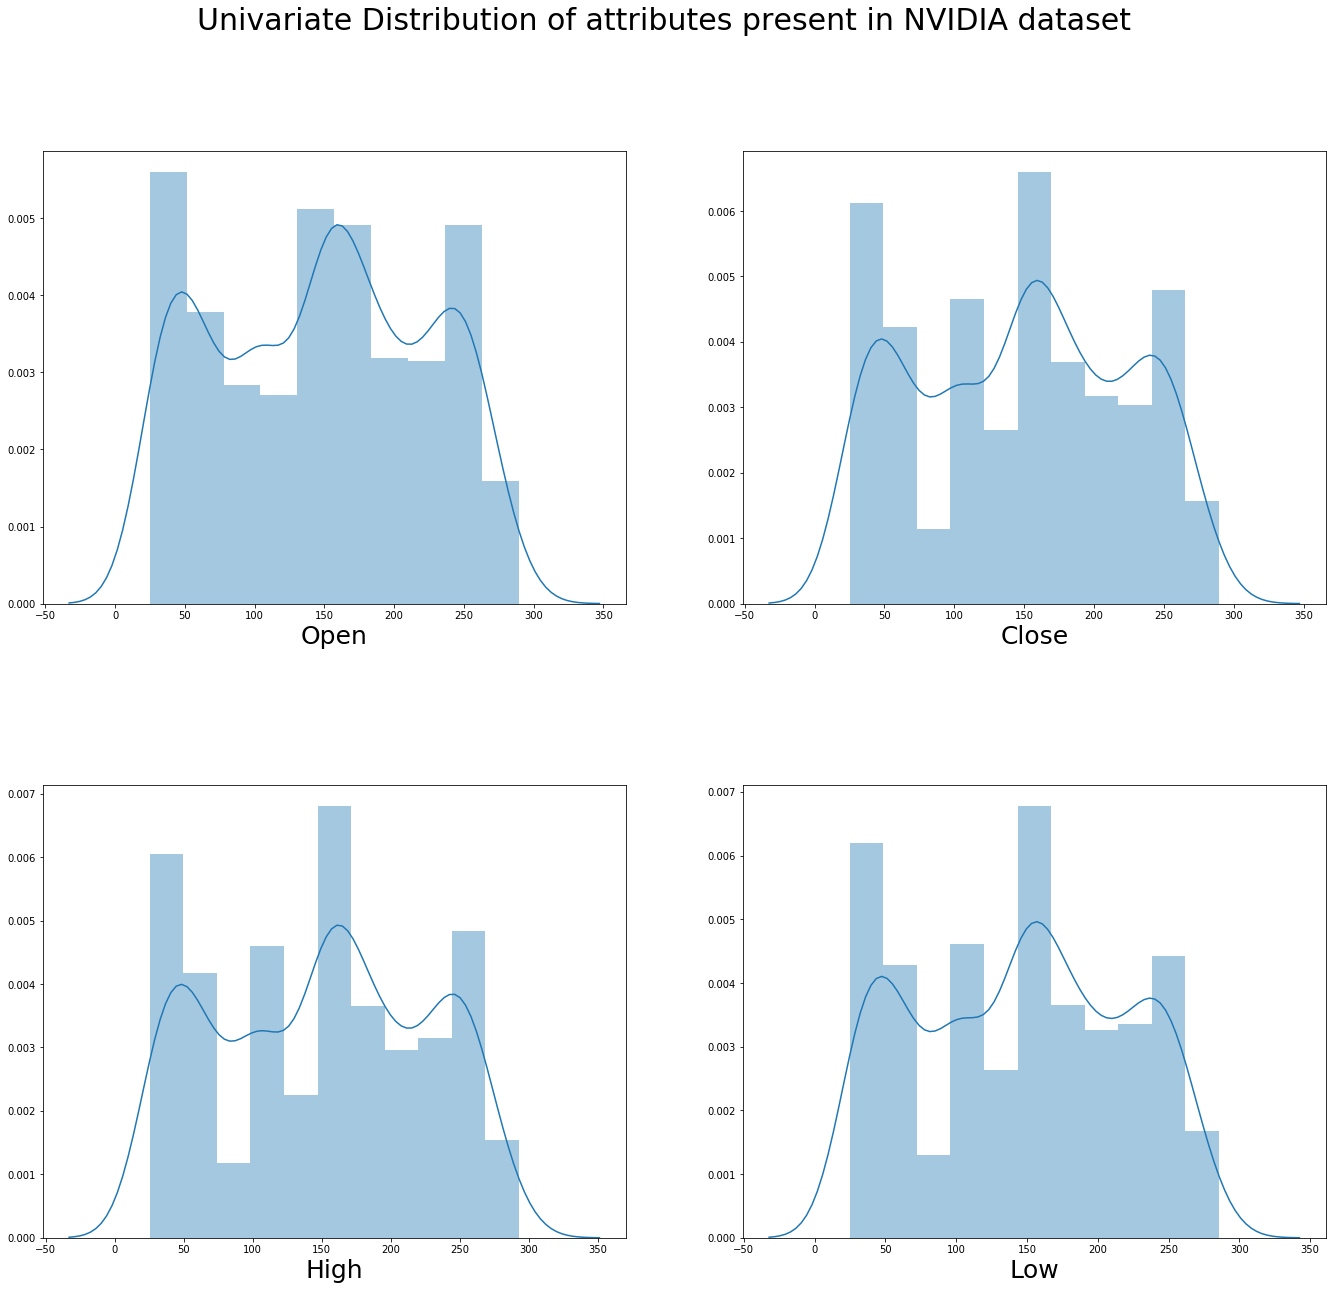

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(23,20))
plt.subplots_adjust(hspace=0.4)

z = pd.Series()
for col in df.columns.values[1:]:
    colums=np.array(df[col])
    z[col]=colums
#p=z.loc[z.index]


for i in range(2):
    for j in range(2):
        
       
        y=z.index[i*2+j]
        x=z[i*2+j].astype(float)
        
        b=sns.distplot(x,ax=axes[i,j])
        b.set_xlabel(y,fontsize=25)

fig.suptitle('Univariate Distribution of attributes present in NVIDIA dataset', fontsize='30')
plt.show()

### Kalman Filter & Smoother

In [10]:
def Kalman_Filter(Y):
    S = Y.shape[0]
    S = S + 1
   
    Z = param0[0]
    T = param0[1]
    H = param0[2]
    Q = param0[3]
    "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    KF_Dens = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            F[s] = Z*P_predict[s-1]*np.transpose(Z)+H 
            v[s]=Y[s-1]-Z*u_predict[s-1]   
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_update[s]; 
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1];
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
            KF_Dens[s] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(abs(F[s]))+(1/2)*np.transpose(v[s])*(1/F[s])*v[s]     
            Likelihood = np.sum(KF_Dens[1:-1])  
            return Likelihood



In [11]:
def Kalman_Smoother(params, Y):
    S = Y.shape[0]
    S = S + 1
    
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]

    "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            F[s] = Z*P_predict[s-1]*np.transpose(Z)+H 
            v[s]=Y[s-1]-Z*u_predict[s-1]   
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_update[s]; 
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1];
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q

        u_smooth = np.zeros(S)
        P_smooth = np.zeros(S)
        u_smooth[S-1] = u_update[S-1]
        P_smooth[S-1] = P_update[S-1]    
    for  t in range(S-1,0,-1):
        u_smooth[t-1] = u_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]-T*u_update[t])
        P_smooth[t-1] = P_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_predict[t])/P_predict[t]*T*P_update[t]
    u_smooth = u_smooth[0:-1]
    return u_smooth

### Garch Filter & Smoother

In [12]:
def GARCH(Y):
    "Initialize Params"
    mu= param0[0]
    omega=param0[1]
    alpha=param0[2]
    beta=param0[3]
    T=Y.shape[0]
    GARCH_Dens= np.zeros(T)
    sigma2=np.zeros(T)
    F= np.zeros(T)
    v=np.zeros(T)
    for t in range(1,T):
        sigma2[t]=omega+ alpha * ((Y[t-1]-mu)**2)+beta*(sigma2[t-1])
        F[t]=Y[t]-mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        v[t]=sigma2[t]
        GARCH_Dens[t]=(1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
        (1/2)*(F[t]/v[t])
        Likelihood = np.sum(GARCH_Dens[1:-1])
    return Likelihood
        

In [13]:

def GARCH_Prod(params,Y0,T):
    "Initialize Params"
    mu= param0[0]
    omega=param0[1]
    alpha=param0[2]
    beta=param0[3]
    T=Y.shape[0]
    GARCH_Dens= np.zeros(T)
    sigma2=np.zeros(T)
    F= np.zeros(T)
    v=np.zeros(T)
    for t in range(1,T):
        sigma2[t]=omega+ alpha * ((Y[t-1]-mu)**2)+beta*(sigma2[t-1])
        Y[t]=Y[t]-mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
       
 
    return Y

### For Random Array use of Kalman filters

Optimization terminated successfully.
         Current function value: 4.280007
         Iterations: 4
         Function evaluations: 48
         Gradient evaluations: 8


C:\Users\manee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: OptimizeWarning: Unknown solver options: xtol
  after removing the cwd from sys.path.


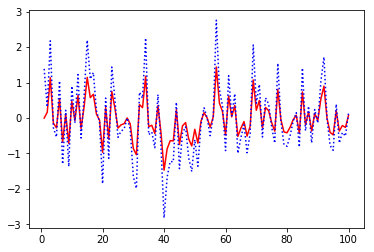

In [14]:
T = 100
Y = np.random.normal(0,1,T)
param0 = np.array([1.3, 0.7, 0.8, 1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)
timevec = np.linspace(1,T,T)
plt.plot(timevec, u,'r',timevec, Y,'b:')

### For Random Array use of Garch filters

         Current function value: 0.102779
         Iterations: 2
         Function evaluations: 156
         Gradient evaluations: 24


C:\Users\manee\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


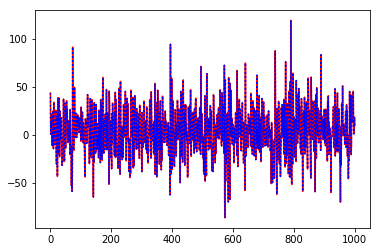

In [15]:
T=1000
mu= 35
sig = 5

Y=np.random.normal(mu,sig,T)
param0=np.array([32,3.5,0.2,0.5])
param_star=minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})
Y_GARCH=GARCH_Prod(param_star.x,Y[0],T)
timevec=np.linspace(1,T,T)

plt.plot(timevec,Y_GARCH,'r',timevec,Y,'b:')

## Presentation with respect to the High price for NVIDIA dataset

## For Kalman Filter

In [39]:
#Y = (df['Open'].astype(float) + df['Close'].astype(float))/2   ###average of open-close price is our target variable

In [40]:
#High_price=df['High'].astype(float).to_numpy()

Optimization terminated successfully.
         Current function value: 4.280007
         Iterations: 4
         Function evaluations: 48
         Gradient evaluations: 8


C:\Users\manee\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


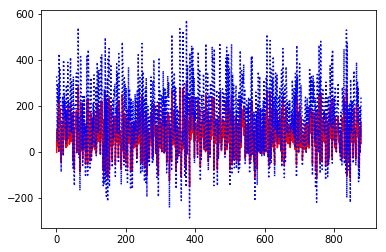

In [16]:
T = 878

mean = Close_mean
std = Close_std
Y = np.random.normal(mean,std,T)
param0 = np.array([1.3, 0.7, 0.8, 1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)
timevec = np.linspace(1,T,T)
plt.plot(timevec, u,'r',timevec, Y,'b:')

Optimization terminated successfully.
         Current function value: 2.778158
         Iterations: 3
         Function evaluations: 30
         Gradient evaluations: 5


C:\Users\manee\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: OptimizeWarning: Unknown solver options: xtol
  """


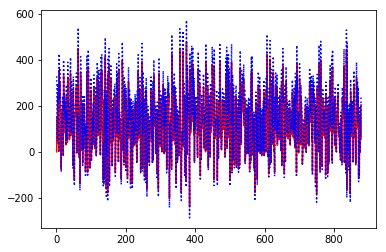

In [17]:
## with changed param0
T = 878
#Y = np.random.normal(0,1,T)
param0 = np.array([1,0.2,0.2,1]) 
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)
timevec = np.linspace(1,T,T)
plt.plot(timevec, u,'r',timevec, Y,'b:')

## For Garch Filter

         Current function value: 0.549509
         Iterations: 1
         Function evaluations: 138
         Gradient evaluations: 21


C:\Users\manee\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: OptimizeWarning: Unknown solver options: xtol
  import sys


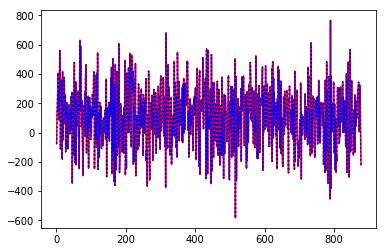

In [18]:
T=878
mu= Close_mean
sig = Close_std

Y=np.random.normal(mu,sig,T)
param0=np.array([32,3.5,0.2,0.5])
param_star=minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})
Y_GARCH=GARCH_Prod(param_star.x,Y,T)
timevec=np.linspace(1,T,T)

plt.plot(timevec,Y_GARCH,'r',timevec,Y,'b:')

## Moving Average

C:\Users\manee\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


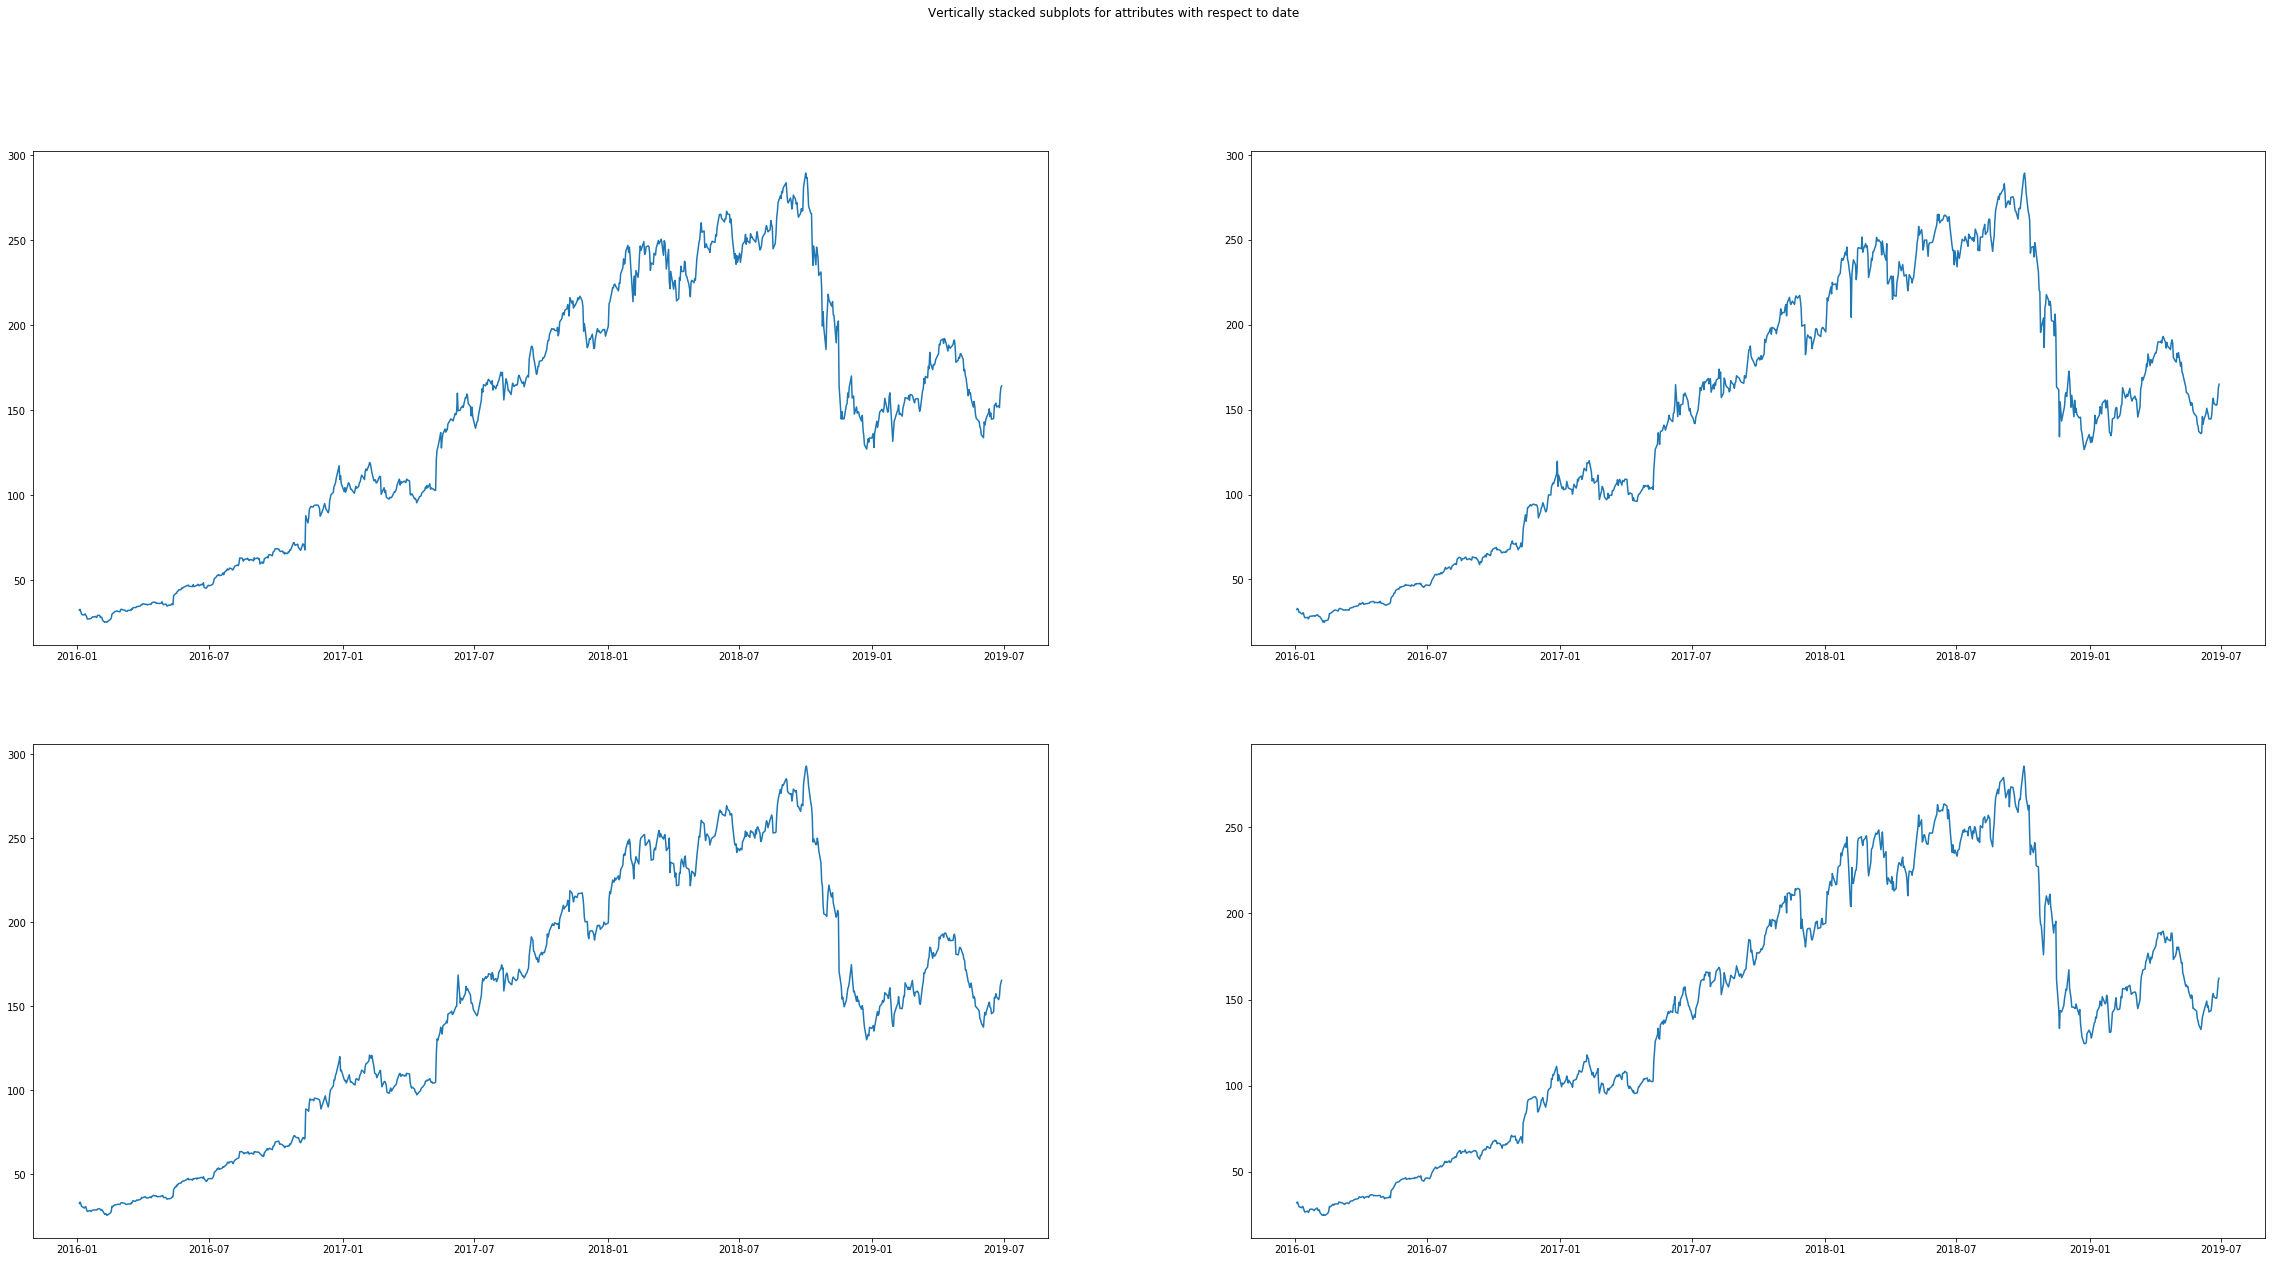

In [19]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%d-%b-%y')
df.index = df['Date']

#fig = plt.figure(figsize=(40,20))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,20))

fig.suptitle('Vertically stacked subplots for attributes with respect to date')
ax1.plot(df['Close'].astype(float))
ax2.plot(df['Open'].astype(float))
ax3.plot(df['High'].astype(float))
ax4.plot(df['Low'].astype(float))